In [7]:
import pandas as pd
from google.colab import files
uploaded=files.upload()


Saving data.csv to data.csv


In [9]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame 
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
import seaborn as sns

#Data Exploration

In [10]:
df=pd.read_csv("data.csv")
print(df.head())


         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
print(df.describe())

                 id  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
count  5.690000e+02   569.000000  ...               569.000000          0.0
mean   3.037183e+07    14.127292  ...                 0.083946          NaN
std    1.250206e+08     3.524049  ...                 0.018061          NaN
min    8.670000e+03     6.981000  ...                 0.055040          NaN
25%    8.692180e+05    11.700000  ...                 0.071460          NaN
50%    9.060240e+05    13.370000  ...                 0.080040          NaN
75%    8.813129e+06    15.780000  ...                 0.092080          NaN
max    9.113205e+08    28.110000  ...                 0.207500          NaN

[8 rows x 32 columns]


In [13]:
print(df.T)

                              0         1    ...       567       568
id                         842302    842517  ...    927241     92751
diagnosis                       M         M  ...         M         B
radius_mean                 17.99     20.57  ...      20.6      7.76
texture_mean                10.38     17.77  ...     29.33     24.54
perimeter_mean              122.8     132.9  ...     140.1     47.92
area_mean                    1001      1326  ...      1265       181
smoothness_mean            0.1184   0.08474  ...    0.1178   0.05263
compactness_mean           0.2776   0.07864  ...     0.277   0.04362
concavity_mean             0.3001    0.0869  ...    0.3514         0
concave points_mean        0.1471   0.07017  ...     0.152         0
symmetry_mean              0.2419    0.1812  ...    0.2397    0.1587
fractal_dimension_mean    0.07871   0.05667  ...   0.07016   0.05884
radius_se                   1.095    0.5435  ...     0.726    0.3857
texture_se                 0.9053 

#LR vs DT vs RF

In [15]:
data=pd.DataFrame(df)
data_train =data.drop(columns = ['id','diagnosis','Unnamed: 32'])

In [16]:
print(data_train)

     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [17]:
#Creating  a new variable {disease_type} 
disease_type = data['diagnosis'].astype('category')
print(disease_type)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: category
Categories (2, object): ['B', 'M']


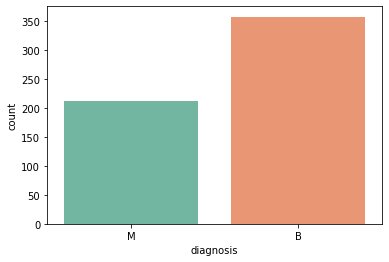

In [18]:
#Visualize the data in order to see the count of both the categories
sns.countplot(x='diagnosis',data=data,palette='Set2')

In [19]:
#Replacing the targets with 0 and 1
targets=disease_type.replace(('M','B'),(1,0))
targets

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## split the data into test & train

In [20]:
x_train,x_test,y_train,y_test = train_test_split(data_train,targets,test_size =0.4)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(341, 30)
(228, 30)
(341,)
(228,)


##logistic regression

####Predicting the given data using logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier=classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
prediction= classifier.predict(x_test)
prediction
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       141
           1       0.93      0.90      0.91        87

    accuracy                           0.93       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.93      0.93      0.93       228



In [23]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test,prediction))

0.9342105263157895


##Decision Tree

#####Predicting the data using decision tree classifier and visualizing the tree  & the accuracy may or may not improve .

In [24]:
#Decision Tree

classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(y_test,prediction))
print (confusion_matrix(y_test,prediction))
print (accuracy_score(y_test,prediction))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       141
           1       0.85      0.89      0.87        87

    accuracy                           0.89       228
   macro avg       0.89      0.89      0.89       228
weighted avg       0.90      0.89      0.90       228

[[127  14]
 [ 10  77]]
0.8947368421052632


#####Decision tree is mostly used to help identify a strategy most likely to reach a goal

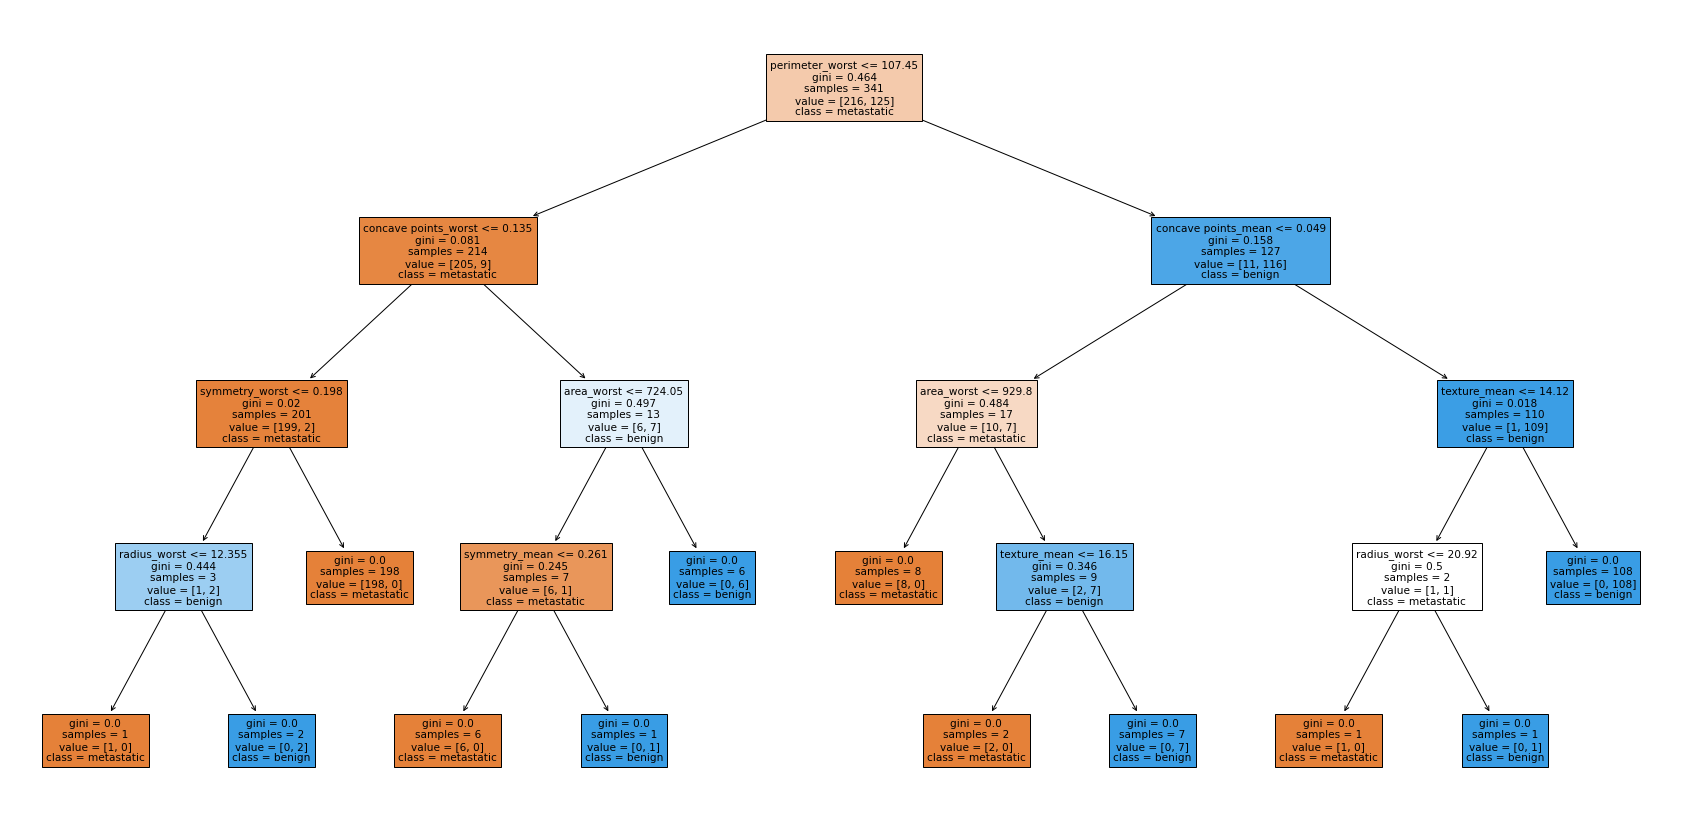

In [25]:
from sklearn import tree
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(classifier, 
                   feature_names=x_train.columns.values, 
                     class_names = ['metastatic','benign'],
                   filled=True)

##Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)


In [27]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.9298245614035088

Text(0.5, 0, 'Number of Trees')

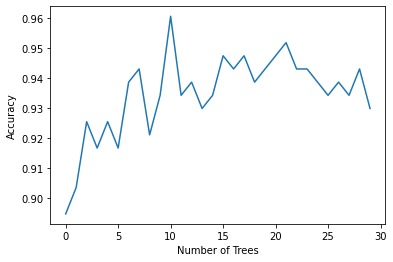

In [28]:
import matplotlib.pylab as plt
trees=range(30)
accuracy=np.zeros(30)

for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(x_train,y_train)
    predictions=classifier.predict(x_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(y_test, predictions)
plt.cla()  
plt.plot(trees, accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Number of Trees')